In [4]:
import random
import numpy as np
import tensorflow as tf
#to stay standardized everytime i run the model
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [5]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# i will be using plant village dataset to train this model
!pip install kaggle

In [12]:
# accesing the kaggle file and converting it to a python dictionary
kaggleAccount=json.load(open('kaggle.json'))

In [10]:
# geeting kaggle creditentials
os.environ['KAGGLE_USERNAME']=kaggleAccount['username']
os.environ['KAGGLE_KEY']=kaggleAccount['key']

In [11]:
# downloading dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:21<00:00, 265MB/s]
100% 2.04G/2.04G [00:21<00:00, 100MB/s]


In [15]:
zipPath='plantvillage-dataset.zip'

try:
  if os.path.exists(zipPath):
    with ZipFile('plantvillage-dataset.zip','r') as zipObj:
        zipObj.extractall()
  else:
    print('dataset not found')
except Exception as e:
    print(e)

In [17]:
# getting a preview of the database
print(os.listdir('plantvillage dataset'))


['color', 'segmented', 'grayscale']


In [18]:
print(len(os.listdir('plantvillage dataset/color')))
print(len(os.listdir('plantvillage dataset/segmented')))
print(len(os.listdir('plantvillage dataset/grayscale')))

38
38
38


In [22]:
print(os.listdir('plantvillage dataset/color')[:2])
print(os.listdir('plantvillage dataset/segmented')[:2])
print(os.listdir('plantvillage dataset/grayscale')[:2])

['Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold']
['Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold']
['Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold']


In [24]:
print(len(os.listdir("plantvillage dataset/color/Tomato___Leaf_Mold")))

952


In [25]:
baseDirectory= "plantvillage dataset/color"

(256, 256, 3)


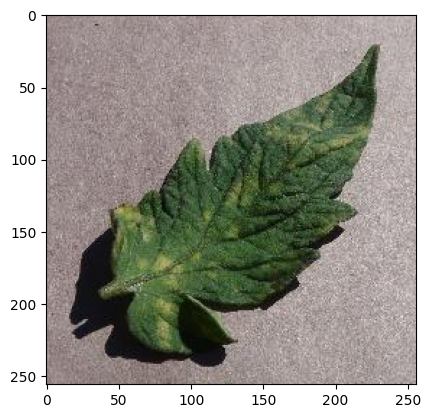

In [30]:
imagePath='/content/plantvillage dataset/color/Tomato___Leaf_Mold/0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823.JPG'
img=mpimg.imread(imagePath)
print(img.shape)
plt.imshow(img)


In [31]:
# i will keep image size of 224 as most models are pretrained on such images
imgSize=224
batchSize=32

In [33]:
dataGenerator= ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [34]:
trainGenerator=dataGenerator.flow_from_directory(
    baseDirectory,
    target_size=(imgSize,imgSize),
    batch_size=batchSize,
    subset='training',
    class_mode='categorical',
)
validationGenerator=dataGenerator.flow_from_directory(
    baseDirectory,
    target_size=(imgSize,imgSize),
    batch_size=batchSize,
    subset='validation',
    class_mode='categorical',
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [41]:
model=models.Sequential()

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(imgSize,imgSize,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(trainGenerator.num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,254,438 (84.89 MB)

 Trainable params: 22,254,438 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
history=model.fit(
    trainGenerator,
    steps_per_epoch=trainGenerator.samples//batchSize,
    epochs=2,
    validation_data=validationGenerator,
    validation_steps=validationGenerator.samples//batchSize,
)

Epoch 1/2
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 627s 461ms/step - accuracy: 0.7066 - loss: 0.9435 - val_accuracy: 0.7859 - val_loss: 0.6676
Epoch 2/2
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 618s 455ms/step - accuracy: 0.8131 - loss: 0.5875 - val_accuracy: 0.8402 - val_loss: 0.4859


In [55]:
oss, accu=model.evaluate(validationGenerator, steps=validationGenerator.samples//batchSize)
print(f"Accuracy: {accu*100:.2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 123s 363ms/step - accuracy: 0.8358 - loss: 0.4875
Accuracy: 84.04%


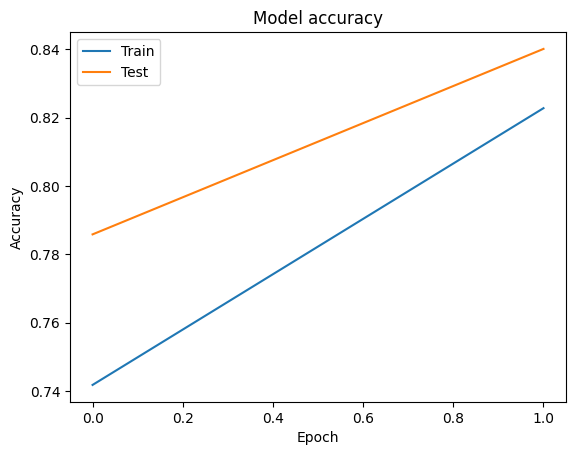

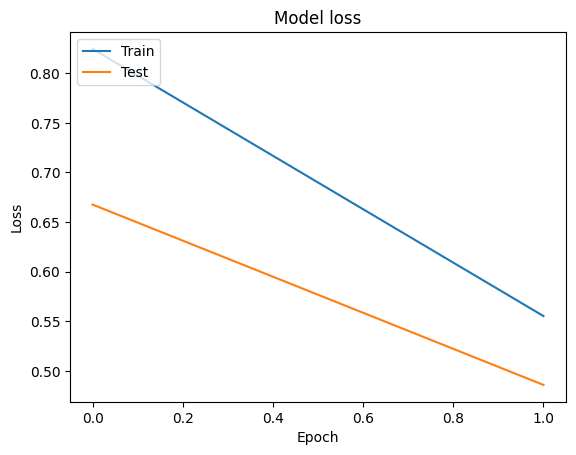

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [63]:
def PreProcessImage(imagePath, targetSize=(224,224)):
  img=Image.open(imagePath)
  img=img.resize(targetSize)
  imgArray=np.array(img)
  imgArray=np.expand_dims(imgArray, axis=0)
  imgArray=imgArray.astype('float32')/255.0
  return imgArray

def predictImage(model, imgPath, classIndices):
  preprocessedImage=PreProcessImage(imgPath)
  prediction=model.predict(preprocessedImage)
  predictedClassIndex=np.argmax(prediction, axis=1)[0]
  predictClassName=classIndices[predictedClassIndex]
  return predictClassName

In [65]:
classIndices={v: k for k, v in trainGenerator.class_indices.items()}

In [66]:
classIndices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [67]:
json.dump(classIndices, open('classIndices.json','w'))

In [68]:
model.save('/content/drive/MyDrive/plantVillageModel.h5')

In [70]:
imgPath='/content/plantvillage dataset/color/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG'
predictClassName= predictImage(model, imgPath, classIndices)
print("Predicted class name: ",predictClassName)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class name:  Blueberry___healthy
